<a href="https://colab.research.google.com/github/119020/NLP_2025_Spring_Materials/blob/main/CUHK_RA_TASK/NLP_Task_1_0331.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Task 1: Topic Model
**CUHK RA Recruitment:** Technical Task Sheet
for Prof. Ling Cen (2025)





*Please enter your personal information (make sure you have copied this colab)*

**Name**: 匡博文 KUANG, Bowen

**Institution**: The Chinese University of Hong Kong, Shenzhen

**Student ID**: 119020237






1. **Make a copy of the provided Google Colab file.**  
   First, you need to make a copy of the provided file into your own Google Drive. To accomplish this, open the Colab file link, navigate to `File` → `Save a copy in Drive`.

2. **Execute the notebook to generate results.**  
   You can click on "Connect to GPU" to apply for a free T4 GPU. Then, you can press the large play button to run a code cell.

For more detailed instructions, refer to [Working with Google Colab](https://docs.google.com/document/d/1vMe8kC-oSyP3w7rIurDbG3NqfyQw7sZJ2C_S2ngtQnk/edit?usp=sharing).

In [7]:
import json
import pandas as pd
from sentence_transformers import SentenceTransformer

# 可选：启用OpenMP并行（需安装）
import os
os.environ["OMP_NUM_THREADS"] = "4"  # 设为CPU物理核心数

!wget -O content_samples.jl -qq --no-check-certificate "https://drive.usercontent.google.com/u/0/uc?id=1s_k8Gs7ZqYuRgGYPSlgUUN27G32zeKc-&export=download"

In [18]:
# 读取数据
data = []
with open('content_samples.jl', 'r') as f:
    for line in f:
        sample = json.loads(line)
        content = sample.get('Content', '')
        Time = sample.get('time', '')
        year = int(Time.split('-')[0]) if Time else None
        name = sample.get('Name', '')
        data.append({'content': content, 'year': year, 'name': name})

df = pd.DataFrame(data)
df
#df = df.sample(frac=0.02, random_state=42)# 0.02*112425

,content,year,name
0,"Karen, the turnover rates or retention rates ...",2001,THOMAS B. GOLISANO
1,It is safe to say that they declined fairly s...,2001,NATHAN SARKISIAN
2,"We don't forecast, we order, all right, and s...",2001,JOHN DAANE
3,Okay next for John. John on the MPLD product ...,2001,TIM MAHON
4,Since a very small amount of dollars that are...,2001,KENDA GONZALEZ
...,...,...,...
112420,And does that -- how do you see the market ch...,2003,Thad Piper
112421,"Yes, I wanted to get some direction as to whe...",2003,Rizwan Ali
112422,"If you did something with that, could you sor...",2003,Michael Fuller
112423,"Real quick, given first quarter FFO, and som...",2004,Mike Mueller


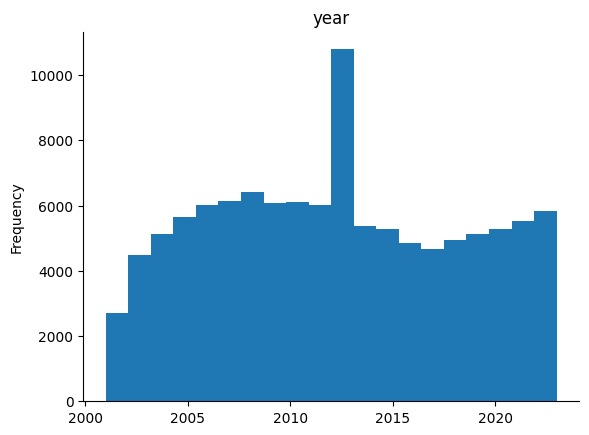

In [17]:
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

1. Tokenize and lower-case texts.

## Task 1.1
Encode Content into embeddings using large language models (LLMs)

In [20]:
# 使用Google Colab T4-GPU
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda') # 1min 30s

start = time.time()
embeddings = model.encode(df['content'].tolist(), show_progress_bar=True)
print(f"Processed samples in {time.time()-start:.2f}s")
df['embedding'] = list(embeddings)

df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3514 [00:00<?, ?it/s]

Processed 2% samples in 80.67s


,content,year,name,embedding
0,"Karen, the turnover rates or retention rates ...",2001,THOMAS B. GOLISANO,"[-0.0332781, -0.020988652, -0.0060465313, -0.0..."
1,It is safe to say that they declined fairly s...,2001,NATHAN SARKISIAN,"[0.09617854, 0.025000563, 0.013329434, 0.00289..."
2,"We don't forecast, we order, all right, and s...",2001,JOHN DAANE,"[-0.049134362, -0.035280608, 0.04388955, 0.079..."
3,Okay next for John. John on the MPLD product ...,2001,TIM MAHON,"[-0.0588812, -0.10597509, -0.08214823, -0.0235..."
4,Since a very small amount of dollars that are...,2001,KENDA GONZALEZ,"[0.13644427, -0.024827296, -0.039129537, -0.01..."
...,...,...,...,...
112420,And does that -- how do you see the market ch...,2003,Thad Piper,"[-0.016217073, -0.04707117, -0.011495747, -0.0..."
112421,"Yes, I wanted to get some direction as to whe...",2003,Rizwan Ali,"[-0.077636376, -0.1273634, 0.011113758, -0.008..."
112422,"If you did something with that, could you sor...",2003,Michael Fuller,"[-0.036238562, 0.011376738, -0.07173897, 0.021..."
112423,"Real quick, given first quarter FFO, and som...",2004,Mike Mueller,"[0.08148661, -0.036014773, 0.032603115, 0.0513..."


from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

## Task 1.2
Use more than two methods to identify most top 20 frequently discussed hot topics of the
questions of each 4 years ([2000, 2003], [2004, 2007], . . . , [2020, 2022]).

In [22]:
!pip -qq install bertopic

import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.9 MB/s eta 0:00:00


In [23]:
# 定义时间段生成函数
def get_periods(start=2000, end=2022):
    periods = []
    current = start
    while current <= end:
        next_end = current + 3
        if next_end > end:
            next_end = end
        periods.append((current, next_end))
        current = next_end + 1
    return periods

periods = get_periods()

# 预处理函数
def preprocess(text):
    return text.lower()  # 可根据需要扩展更复杂的预处理


# 对每个时间段进行分析 (执行时间：预计12分钟)
for start, end in periods:
    mask = (df['year'] >= start) & (df['year'] <= end)
    period_df = df[mask]
    texts = period_df['content'].tolist()

    # 方法1: LDA
    vectorizer = CountVectorizer(preprocessor=preprocess, max_features=2000)
    X = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=20, random_state=42)
    lda.fit(X)

    # 提取LDA主题词
    feature_names = vectorizer.get_feature_names_out()
    lda_topics = []
    for idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-10:]]
        lda_topics.append(f"Topic {idx}: {', '.join(top_words)}")

    # 方法2: BERTopic
    embeddings_period = np.stack(period_df['embedding'].values)
    topic_model = BERTopic()
    topics, _ = topic_model.fit_transform(texts, embeddings_period)

    # 获取BERTopic结果
    bert_topics = []
    for topic_num in set(topics):
        if topic_num != -1:
            words = topic_model.get_topic(topic_num)
            bert_topics.append(f"Topic {topic_num}: {', '.join([w[0] for w in words[:5]])}")

    print(f"Period {start}-{end}:")
    print("LDA Topics:", lda_topics[:5])
    print("BERTopic Topics:", bert_topics[:5])


Period 2000-2003:
LDA Topics: ['Topic 0: is, are, have, in, of, to, and, that, the, we', 'Topic 1: year, quarter, and, is, you, of, that, in, to, the', 'Topic 2: your, kind, that, sort, in, and, to, you, the, of', 'Topic 3: of, from, that, on, and, to, is, you, question, the', 'Topic 4: ok, congratulations, yeah, lot, great, okay, guys, morning, good, thanks']
BERTopic Topics: ['Topic 0: thank, you, thankyou, sir, it', 'Topic 1: okay, alright, nail, stop, perfect', 'Topic 2: margin, gross, margins, quarter, improvement', 'Topic 3: patients, fda, study, the, with', 'Topic 4: europe, mexico, gulf, gas, prices']
Period 2004-2007:
LDA Topics: ['Topic 0: be, going, should, and, that, of, you, the, to, we', 'Topic 1: that, quarter, on, congratulations, afternoon, hi, guys, morning, yes, good', 'Topic 2: would, of, be, is, it, and, you, that, to, the', 'Topic 3: any, is, for, okay, inaudible, one, question, on, and, the', 'Topic 4: this, no, what, with, it, that, to, is, the, for']
BERTopic T

## Task 1.3
Use one method in Task 1.2. to identify the analysts who discussed these hot topics.

In [24]:
from collections import defaultdict
import pandas as pd

# 使用BERTopic结果进行分析（执行时间：预计3分钟）
for start, end in periods:
    mask = (df['year'] >= start) & (df['year'] <= end)
    period_df = df[mask]
    texts = period_df['content'].tolist()
    embeddings_period = np.stack(period_df['embedding'].values)

    topic_model = BERTopic()
    topics, _ = topic_model.fit_transform(texts, embeddings_period)
    period_df['topic'] = topics

    analyst_topics = defaultdict(list)
    for _, row in period_df.iterrows():
        if row['topic'] != -1:
            analyst_topics[row['topic']].append(row['name'])

    print(f"Period {start}-{end} Analyst Participation:")
    for topic in sorted(set(topics)):
        if topic != -1:
            names = analyst_topics[topic]
            counter = dict(pd.Series(names).value_counts().head(3))
            print(f"Topic {topic}: {counter}")

Period 2000-2003 Analyst Participation:
Topic 0: {'Analyst': np.int64(7), 'Jennifer Jordan': np.int64(2), 'George Shapiro': np.int64(2)}
Topic 1: {'Analyst': np.int64(11), 'Unidentified Participant': np.int64(4), 'Kristine Koerber': np.int64(2)}
Topic 2: {'Analyst': np.int64(4), 'CLAYTON DALEY': np.int64(1), 'JEFF AARONS': np.int64(1)}
Topic 3: {'Unidentified Participant': np.int64(4), 'Mark Landy': np.int64(3), 'Analyst': np.int64(2)}
Topic 4: {'Operator': np.int64(2), 'Analyst': np.int64(2), 'Robert Weminau (ph)': np.int64(2)}
Topic 5: {'Analyst': np.int64(3), 'Unidentified Participant': np.int64(2), 'Paul Morgan': np.int64(2)}
Topic 6: {'Analyst': np.int64(6), 'David Lewis': np.int64(2), 'Jerry Wills': np.int64(1)}
Topic 7: {'Analyst': np.int64(4), 'Fred Taylor': np.int64(2), 'MATTHEW LENTZ': np.int64(1)}
Topic 8: {'Analyst': np.int64(7), 'Don Roberts': np.int64(2), 'GARY GORDEN': np.int64(1)}
Topic 9: {'Analyst': np.int64(2), 'Keith Dunne': np.int64(2), 'JOHN W. ROWE': np.int64(1)}

## NLTK Alternatives

In [10]:
!pip -qq install nltk==3.8
import nltk
import numpy as np
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from tqdm import tqdm


texts = df.content.replace(np.nan, '', regex=True)

print(len(texts))

tokenized_texts = [word_tokenize(text.lower()) for text in tqdm(texts)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


112425


100%|██████████| 112425/112425 [00:33<00:00, 3308.59it/s]


In [12]:
tokenized_texts[0]
#texts[0:10]

['karen',
 ',',
 'the',
 'turnover',
 'rates',
 'or',
 'retention',
 'rates',
 'in',
 'our',
 'clients',
 'for',
 'major',
 'markets',
 '-',
 'the',
 'retention',
 'rate',
 'is',
 'much',
 'higher',
 'and',
 'probably',
 'the',
 'reason',
 'for',
 'it',
 ',',
 'the',
 'single',
 'largest',
 'reason',
 'for',
 'it',
 ',',
 'is',
 'the',
 'fact',
 'that',
 'you',
 'do',
 "n't",
 'have',
 'businesses',
 'going',
 'in',
 'and',
 'out',
 'of',
 'business',
 'like',
 'you',
 'do',
 'at',
 'long',
 'end',
 'of',
 'the',
 'marketplace',
 '.',
 'a',
 'client',
 'base',
 'is',
 'a',
 'much',
 'more',
 'stable',
 'group',
 'of',
 'companies',
 'than',
 'they',
 'are',
 'in',
 'a',
 'core',
 'payroll',
 'service',
 '.',
 'so',
 ',',
 'consequently',
 ',',
 'the',
 'retention',
 'level',
 'is',
 'much',
 'higher',
 'with',
 'major',
 'markets',
 '.',
 'as',
 'far',
 'as',
 'technology',
 'is',
 'concerned',
 ',',
 'paychex',
 'is',
 'moving',
 'to',
 'a',
 'direction',
 'of',
 'bringing',
 'our',
 

2. Collect the indices of the words:

In [13]:
from collections import Counter

MIN_COUNT = 5

words_counter = Counter(token for tokens in tokenized_texts for token in tokens)
word2index = {
    '<unk>': 0# index2word[0]，标记符
}

#print(words_counter.most_common())
for word, count in words_counter.most_common():
    if count < MIN_COUNT:
        break

    word2index[word] = len(word2index)

#print(word2index)
index2word = [word for word, _ in sorted(word2index.items(), key=lambda x: x[1])]
#print(index2word)# 词库转化成list，按出现次数由大到小排序

#print('Vocabulary size:', len(index2word))
print('Vocabulary size:', len(word2index))# 只统计出现次数>=5的word
print('Tokens count:', sum(len(tokens) for tokens in tokenized_texts))# 语料库所有语句的总词数（也等于不同单词按出现次数的加权和）
print('Unknown tokens appeared:', sum(1 for tokens in tokenized_texts for token in tokens if token not in word2index))# 出现次数<5的word总数
print('Most freq words:', index2word[1:21])

Vocabulary size: 15225
Tokens count: 5661318
Unknown tokens appeared: 65842
Most freq words: [',', 'the', '.', 'you', 'that', 'of', '?', 'and', 'to', 'in', 'a', 'i', 'is', 'on', 'it', 'just', 'for', 'your', 'what', "'s"]


3. collect the context words

First of all, we need to collect all the contexts from our corpus.

In [14]:
def build_contexts(tokenized_texts, window_size):
    contexts = []
    for tokens in tokenized_texts:
        for i in range(len(tokens)):
            central_word = tokens[i]
            context = [tokens[i + delta] for delta in range(-window_size, window_size + 1)
                       if delta != 0 and i + delta >= 0 and i + delta < len(tokens)]

            contexts.append((central_word, context))

    return contexts

contexts = build_contexts(tokenized_texts, window_size=2)

Check, what you got:

In [15]:
contexts[:20]
# len=2 第一个词（只有后两个词）/最后一个词（或标点，只有前两个词）
# len=3 第二个词（前1个词+后两个词）/倒数第二个词（前两个词+后1个词）
# len=4 中间的词（前两个词+后两个词）

[('karen', [',', 'the']),
 (',', ['karen', 'the', 'turnover']),
 ('the', ['karen', ',', 'turnover', 'rates']),
 ('turnover', [',', 'the', 'rates', 'or']),
 ('rates', ['the', 'turnover', 'or', 'retention']),
 ('or', ['turnover', 'rates', 'retention', 'rates']),
 ('retention', ['rates', 'or', 'rates', 'in']),
 ('rates', ['or', 'retention', 'in', 'our']),
 ('in', ['retention', 'rates', 'our', 'clients']),
 ('our', ['rates', 'in', 'clients', 'for']),
 ('clients', ['in', 'our', 'for', 'major']),
 ('for', ['our', 'clients', 'major', 'markets']),
 ('major', ['clients', 'for', 'markets', '-']),
 ('markets', ['for', 'major', '-', 'the']),
 ('-', ['major', 'markets', 'the', 'retention']),
 ('the', ['markets', '-', 'retention', 'rate']),
 ('retention', ['-', 'the', 'rate', 'is']),
 ('rate', ['the', 'retention', 'is', 'much']),
 ('is', ['retention', 'rate', 'much', 'higher']),
 ('much', ['rate', 'is', 'higher', 'and'])]

4. Convert to indices

Let's convert words to indices:

In [16]:
contexts = [(word2index.get(central_word, 0), [word2index.get(word, 0) for word in context])
            for central_word, context in contexts]
contexts[:20]# 词转化成按词频生成的index

[(3743, [1, 2]),
 (1, [3743, 2, 2204]),
 (2, [3743, 1, 2204, 289]),
 (2204, [1, 2, 289, 22]),
 (289, [2, 2204, 22, 1718]),
 (22, [2204, 289, 1718, 289]),
 (1718, [289, 22, 289, 10]),
 (289, [22, 1718, 10, 234]),
 (10, [1718, 289, 234, 787]),
 (234, [289, 10, 787, 17]),
 (787, [10, 234, 17, 666]),
 (17, [234, 787, 666, 249]),
 (666, [787, 17, 249, 489]),
 (249, [17, 666, 489, 2]),
 (489, [666, 249, 2, 1718]),
 (2, [249, 489, 1718, 157]),
 (1718, [489, 2, 157, 13]),
 (157, [2, 1718, 13, 61]),
 (13, [1718, 157, 61, 203]),
 (61, [157, 13, 203, 8])]

### **1.2 Continuous Bag of Words (CBoW) Word2vec**

We have learn skip-gram model in tutorial. Now, we will explore another popular Word2Vec paradigm called Continuous Bag of Words (CBoW). *CBoW* offers faster processing and slightly better accuracy for common words compared to the *Skip-Gram*, which is more effective with rare words.

**CBoW Structure**

Below is the CBoW model architecture:

![](https://i.ibb.co/StXTMFH/CBOW.png)

In CBoW, the goal is to predict a target word from its surrounding context, represented by the sum of context vectors.

We will leverage our understanding from the *Skip-Gram* model to implement *CBoW*.

In [19]:
import time
import math

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from IPython.display import clear_output

1. **Batches Generations**
**<font color="red">[Task]</font>** : Implement the batch generator.

**Hint**: The generator should produce a input matrix `(batch_size, 2 * window_size)` containing context word indices and a target matrix `(batch_size)` with central word indices.

In [ ]:
def make_cbow_batches_iter(contexts, window_size, batch_size):

    # 去掉首尾两词（window<4）和标识词（word_index=0）
    central_words = np.array([word for word, context in contexts if len(context) == 2 * window_size and word != 0])
    contexts = np.array([context for word, context in contexts if len(context) == 2 * window_size and word != 0])


    batches_count = int(math.ceil(len(contexts) / batch_size))

    print('Initializing batches generator with {} batches per epoch'.format(batches_count))

    indices = np.arange(len(contexts))
    np.random.shuffle(indices)

    for i in range(batches_count):
      batch_begin, batch_end = i * batch_size, min((i + 1) * batch_size, len(contexts))
      batch_indices = indices[batch_begin: batch_end]

      # Write your implementation here.
      # Get batch data
      batch_contexts = contexts[batch_indices]
      batch_centrals = central_words[batch_indices]

      # Convert to tensors and yield
      # Returns a dictionary with 'tokens' (context words) and 'labels' (target words)
      yield {
        # Converts numpy arrays to PyTorch LongTensors
        'tokens': torch.LongTensor(batch_contexts),
        'labels': torch.LongTensor(batch_centrals)
      }

Check it:

In [ ]:
window_size = 2
batch_size = 32

batch = next(make_cbow_batches_iter(contexts, window_size=window_size, batch_size=batch_size))
#print(batch.items())
assert isinstance(batch, dict)
assert 'labels' in batch and 'tokens' in batch

assert isinstance(batch['tokens'], torch.LongTensor)
assert isinstance(batch['labels'], torch.LongTensor)

assert batch['tokens'].shape == (batch_size, 2 * window_size)
assert batch['labels'].shape == (batch_size,)

Initializing batches generator with 12380 batches per epoch


2. **Model**
**<font color="red">[Task]</font>**: Build the `CBoWModel`.

**Hint**: You need to implement the `forward` method based on the CBoW architecture. The context embedding is represented as the average of their context embeddings.

In [ ]:
class CBoWModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.out_layer = nn.Linear(embedding_dim, vocab_size)

    def forward(self, inputs):
        # Get embeddings for all context words
        context_embeds = self.embeddings(inputs)  # Shape: [batch_size, 2*window, emb_dim]

        # Average the context embeddings across the window dimension
        avg_embeds = context_embeds.mean(dim=1)  # Shape: [batch_size, emb_dim]

        # Generate output logits
        logits = self.out_layer(avg_embeds)  # Shape: [batch_size, vocab_size]
        return logits

Check it:

In [ ]:
model = CBoWModel(vocab_size=len(word2index), embedding_dim=32).cuda()

outputs = model(batch['tokens'].cuda())

assert isinstance(outputs, torch.cuda.FloatTensor)
assert outputs.shape == (batch_size, len(word2index))

3. **Training**
**<font color="red">[Task]</font>** : Train the CBoW.

**Hint**: Consider referring to the training code of the previously mentioned *Skip-gram* model.

In [ ]:
# Here are the hyperparameters you can adjust
embedding_dim = 32
learning_rate = 0.001
epoch_num = 20
batch_size = 128

# Initialization Model
model = CBoWModel(len(word2index),embedding_dim)
# Getting model to GPU
model.cuda()
# Define the loss function
criterion = nn.CrossEntropyLoss()
# use Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

loss_every_nsteps = 3000
total_loss = 0
start_time = time.time()
global_step = 0

for ep in range(epoch_num):
  for step, batch in enumerate(make_cbow_batches_iter(contexts, window_size=2, batch_size=batch_size)):
      global_step += 1

      # Move batch to GPU
      inputs = batch['tokens'].cuda()
      labels = batch['labels'].cuda()
      # 初始化gradient
      optimizer.zero_grad()
      # Forward pass
      outputs = model(inputs)

      # Calculate loss
      loss = criterion(outputs, labels)

      # Backward pass and optimize（做一次gradient descent）
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

      if global_step != 0 and global_step % loss_every_nsteps == 0:
          print("Epoch = {}, Step = {}, Avg Loss = {:.4f}, Time = {:.2f}s".format(ep, step, total_loss / loss_every_nsteps,
                                                                      time.time() - start_time))
          total_loss = 0
          start_time = time.time() # 平均4s/epoch

Initializing batches generator with 3095 batches per epoch
Epoch = 0, Step = 2999, Avg Loss = 6.4792, Time = 4.28s
Initializing batches generator with 3095 batches per epoch
Epoch = 1, Step = 2904, Avg Loss = 5.5652, Time = 3.79s
Initializing batches generator with 3095 batches per epoch
Epoch = 2, Step = 2809, Avg Loss = 5.2524, Time = 3.94s
Initializing batches generator with 3095 batches per epoch
Epoch = 3, Step = 2714, Avg Loss = 5.0570, Time = 4.22s
Initializing batches generator with 3095 batches per epoch
Epoch = 4, Step = 2619, Avg Loss = 4.9147, Time = 3.81s
Initializing batches generator with 3095 batches per epoch
Epoch = 5, Step = 2524, Avg Loss = 4.8091, Time = 3.75s
Initializing batches generator with 3095 batches per epoch
Epoch = 6, Step = 2429, Avg Loss = 4.7171, Time = 4.20s
Initializing batches generator with 3095 batches per epoch
Epoch = 7, Step = 2334, Avg Loss = 4.6391, Time = 3.79s
Initializing batches generator with 3095 batches per epoch
Epoch = 8, Step = 223

**Obtaining word embeddings**

Word embeddings are contained within the embeddings layer of the model. We just need to move them from the GPU to the CPU and convert them to a numpy array.

In [ ]:
embeddings = model.embeddings.weight.data.cpu().numpy()


**Testing Trained Word Embeddings**

Let's check how adequate are similarities that the model learnt.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def most_similar(embeddings, index2word, word2index, word):
    word_emb = embeddings[word2index[word]]

    similarities = cosine_similarity([word_emb], embeddings)[0]
    top10 = np.argsort(similarities)[-10:]

    return [index2word[index] for index in reversed(top10)]

most_similar(embeddings, index2word, word2index, 'my')

['my',
 'your',
 'his',
 'her',
 'pages',
 'our',
 'their',
 '360',
 'john',
 'increases']

**Visualization of our embeddings**

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook

from sklearn.manifold import TSNE
from sklearn.preprocessing import scale


def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    output_notebook()

    if isinstance(color, str):
        color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show:
        pl.show(fig)
    return fig


def get_tsne_projection(word_vectors):
    tsne = TSNE(n_components=2, verbose=1)
    return scale(tsne.fit_transform(word_vectors))


def visualize_embeddings(embeddings, index2word, word_count):
    word_vectors = embeddings[1: word_count + 1]
    words = index2word[1: word_count + 1]

    word_tsne = get_tsne_projection(word_vectors)
    draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='blue', token=words)


visualize_embeddings(embeddings, index2word, 100)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.118707
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.809059
[t-SNE] KL divergence after 950 iterations: 0.496958


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


## Task 2： Explore Word Embeddings with Word2Vec
In this task, we shall explore the embeddings produced by word2vec. Please revisit the lecture slides or tutorials for more details on the word2vec algorithm. If you're feeling adventurous, challenge yourself and try reading the original [paper](https://proceedings.neurips.cc/paper_files/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf).

Then run the following cells to load the word2vec vectors into memory. **Note**: This might take several minutes.

In [ ]:
def load_word2vec():
    """ Load GloVe Twitter Vectors
        Return:
            wv_from_bin: Pre-trained embeddings with 25 dimensions for 1.2M vocabulary.
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-twitter-25")
    vocab = list(wv_from_bin.key_to_index.keys())  # Updated for Gensim 4.x
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [ ]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------
# 加载用时45s
wv_from_bin = load_word2vec()

[==================================================] 100.0% 104.8/104.8MB downloaded
Loaded vocab size 1193514



**Reducing dimensionality of Word2Vec Word Embeddings**

Let's directly compare the word2vec embeddings to those of the co-occurrence matrix. Run the following cells to:

- Put the 1.2 million word2vec vectors into a matrix M
- Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 25-dimensional to 2-dimensional.



In [ ]:
def get_matrix_of_vectors(wv_from_bin, required_words=['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 1.2 million word2vec vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.key_to_index.keys())
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

**Implement reduce_to_k_dim**

Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. Use SVD to take the top k components and produce a new matrix of k-dimensional embeddings.

Note: All of numpy, scipy, and scikit-learn (sklearn) provide some implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

**<font color="red">[Task]</font>**: Complete reduce_to_k_dim function

In [ ]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    # Write your implementation here.
    # Initialize Truncated SVD
    svd = TruncatedSVD(n_components=k, n_iter=n_iters, random_state=42)

    # Apply dimensionality reduction
    M_reduced = svd.fit_transform(M)

    print("Done.")
    return M_reduced

In [ ]:
# -----------------------------------------------------------------
# Run Cell to Reduce 25-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
M, word2Ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10010 words...


<ipython-input-23-380a110fcb9c>:20: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))
<ipython-input-23-380a110fcb9c>:27: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))


Done.


**Here is a helper function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (plt).**

In [ ]:
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.

        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus, k)): matrix of k-dimensional word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """
    plt.figure(figsize=(10, 10))
    for word in words:
        if word in word2Ind:
            idx = word2Ind[word]
            x, y = M_reduced[idx, 0], M_reduced[idx, 1]
            plt.scatter(x, y, marker='o', color='blue')
            plt.text(x + 0.02, y + 0.02, word, fontsize=9)
        else:
            print(f"Word '{word}' not found in word2Ind dictionary.")

    plt.title("Word Embeddings Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

### 2.1: Word2Vec Plot Analysis
Run the cell below to plot the 2D word2vec embeddings for ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela'].

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have? How is the plot different from the one generated earlier from the co-occurrence matrix?

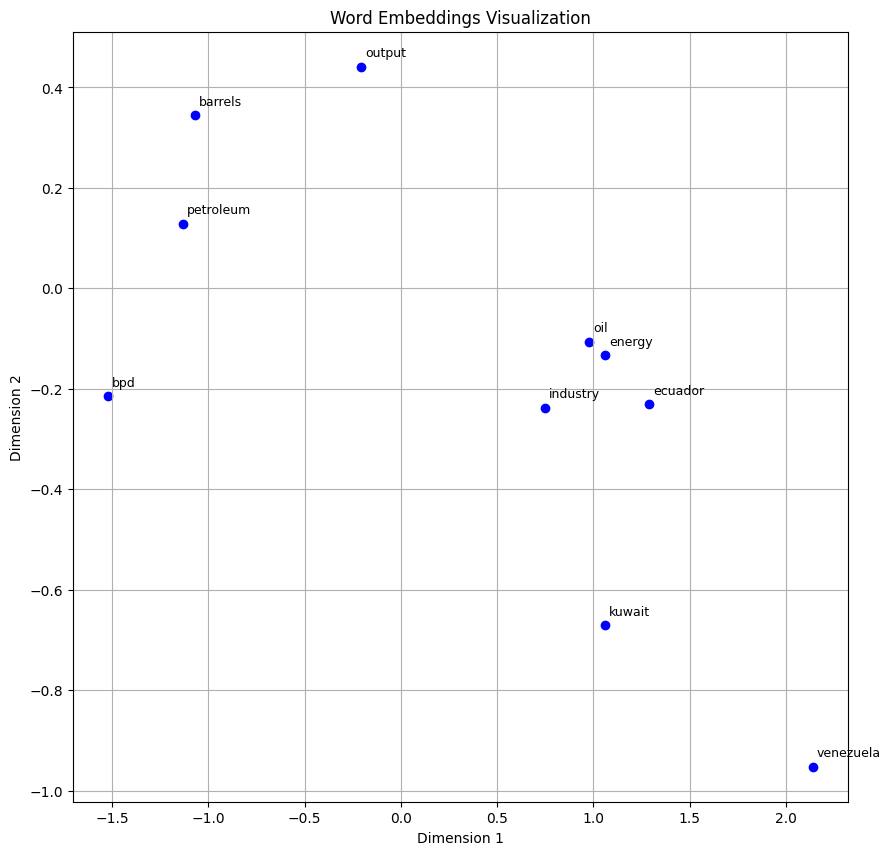

In [ ]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_reduced, word2Ind, words)

**<font color="red">[Task]</font>**:

**Cluster**:
1. 'barrels', 'petroleum', 'bpd' (barrels per day), and 'output' cluster tightly, reflecting their semantic connection to crude oil production.
2. 'kuwait', 'venezuela', and 'ecuador' form a geographical cluster, representing their shared role as major oil exporters.

**Not cluster**:
'petroleum' and 'oil' might be expected to overlap completely as synonyms.

**Comparison to Co-Occurrence Matrix Visualization**:
The Word2Vec plot groups words by semantic similarity (for example, oil-producing nations), while co-occurrence matrices often emphasize syntactic co-occurrence (for example, "oil" + "barrels" in phrases).



### 2.2 Polysemous Words
Find a [polysemous](https://en.wikipedia.org/wiki/Polysemy) word (for example, "leaves" or "scoop") such that the top-10 most similar words (according to cosine similarity) contains related words from both meanings. For example, "leaves" has both "turns" and "ground" in the top 10, and "scoop" has both "buckets" and "pops". You will probably need to try several polysemous words before you find one. Please state the polysemous word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous words you tried didn't work?

Note: You should use the wv_from_bin.most_similar(word) function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance please check the GenSim [documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar).

In [ ]:
# Polysemous word exploration

def find_polysemous(polysemous_word):
  similar_words = wv_from_bin.most_similar(polysemous_word)
  print(f"Top 10 similar words for '{polysemous_word}':")
  print([word for word, sim in similar_words])
  return

potential_wordset = ["bank","chair","check","kind","light","novel","patient"]
for word in potential_wordset:
  print("word: ", word)
  find_polysemous(word)
  print()



word:  bank
Top 10 similar words for 'bank':
['unit', 'service', 'office', 'reg', 'program', 'company', 'open', 'target', 'bp', 'private']

word:  chair
Top 10 similar words for 'chair':
['desk', 'floor', 'window', 'shoulder', 'front', 'bathroom', 'seat', 'wall', 'ceiling', 'roof']

word:  check
Top 10 similar words for 'check':
['free', 'new', 'post', 'special', 'open', 'line', 'list', 'id', 'out', 'best']

word:  kind
Top 10 similar words for 'kind':
['word', 'such', 'is', 'even', 'odd', 'thing', 'made', 'perfect', 'rare', 'exactly']

word:  light
Top 10 similar words for 'light':
['dark', 'deep', 'cross', 'sun', 'heavy', 'clear', 'shadow', 'edge', 'inside', 'side']

word:  novel
Top 10 similar words for 'novel':
['diary', 'comic', 'edit', 'judul', 'majalah', 'lagu', 'script', 'copy', 'film', 'theme']

word:  patient
Top 10 similar words for 'patient':
['responsible', 'pleasure', 'seeking', 'opportunity', 'self', 'positive', 'presence', 'reputation', 'privilege', 'temporary']



**<font color="red">[Task]</font>**:

**polysemous_word**:
'light':
1. meaning of **weight**: 'heavy'
2. meaning of **brightness**: 'sun'
3. meaning of **thickness**: 'deep'

Many of the polysemous words **didn't work**:
1. Most polysemous words have a statistically dominant meaning in training corpora. ("bank" predominantly relates to financial institutions in Twitter data).
2. Some meanings share contextual associations ('bat' in sports and zoology both appear with 'night' or 'wing', since
'wing' is also a polysemous word).

### 2.3: Synonyms & Antonyms

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but Cosine Distance(w1,w3) < Cosine Distance(w1,w2). For example, w1="happy" is closer to w3="sad" than to w2="cheerful".

Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the wv_from_bin.distance(w1, w2) function here in order to compute the cosine distance between two words. Please see the GenSim documentation for further assistance.


In [ ]:
def distance_exploration(w1, w2, w3):
  w1_w2_dist = wv_from_bin.distance(w1, w2)
  w1_w3_dist = wv_from_bin.distance(w1, w3)
  w2_w3_dist = wv_from_bin.distance(w2, w3)
  print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
  print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))
  print("Antonyms {}, {} have cosine distance: {}".format(w2, w3, w2_w3_dist))
  print()
  return

# Test
print(wv_from_bin.distance("be", "be"))
print(wv_from_bin.distance("bat", "tablet"))
print()
# Example 1
distance_exploration("light", "bright", "dark")
# Example 2
distance_exploration("high", "tall", "low")
# Example 3
distance_exploration("big", "large", "small")
# Example 4
distance_exploration("fast", "quick", "slow")
# Example 5
distance_exploration("rich", "wealthy", "poor")

0.0
0.7222889065742493

Synonyms light, bright have cosine distance: 0.10691648721694946
Antonyms light, dark have cosine distance: 0.078238844871521
Antonyms bright, dark have cosine distance: 0.1149187684059143

Synonyms high, tall have cosine distance: 0.21945339441299438
Antonyms high, low have cosine distance: 0.1244133710861206
Antonyms tall, low have cosine distance: 0.29470646381378174

Synonyms big, large have cosine distance: 0.2832111120223999
Antonyms big, small have cosine distance: 0.142084002494812
Antonyms large, small have cosine distance: 0.10240131616592407

Synonyms fast, quick have cosine distance: 0.11719149351119995
Antonyms fast, slow have cosine distance: 0.19635289907455444
Antonyms quick, slow have cosine distance: 0.16050982475280762

Synonyms rich, wealthy have cosine distance: 0.1948477029800415
Antonyms rich, poor have cosine distance: 0.20605862140655518
Antonyms wealthy, poor have cosine distance: 0.3631433844566345



**<font color="red">[Task]</font>**:

For example, w1="big" is closer to w3="small" than to w2="large".

**Possible explanation**:
The model learns antonym pairs through their symmetrical usage patterns (e.g., "not big but small", "large or small"), making their vectors develop parallel directional relationships.

## Task 3: Utilize Word Embeddings

Guess, you've seen such pictures already:  

![Embeddings Relations](https://www.tensorflow.org/images/linear-relationships.png)
*Source: [Tensorflow tutorial on Vector Representations of Words](https://www.tensorflow.org/tutorials/representation/word2vec)*

In the first image, we observe the intricate relationships encoded within the word embeddings space. This encompasses various dimensions like gender differences (male-female) or verb tenses.

**Interactive Exploration**

To delve deeper and interactively explore these relationships, check out these resources:
- [Word Vector Demo](http://bionlp-www.utu.fi/wv_demo/)
- [Word2Viz](https://lamyiowce.github.io/word2viz/)

These tools offer a playful yet insightful experience, allowing you to grasp the nuances and capabilities of word embeddings.

**Our task point**

Our focus will be on utilizing [gensim](https://radimrehurek.com/gensim/), a well-regarded Python library for word embeddings. Gensim makes it effortless to work with and leverage the power of word embeddings in various applications.


### **3.1 Use Pretrained Embeddings**
Base on gensim, we can easily use a well-pretrained embeddings model. There are a number of such models in <font color="blue">gensim</font>, you can call `api.info()` to get the list.

In [ ]:
import gensim.downloader as api

model = api.load('glove-twitter-25')

**use word embedidngs with gensim**

Yay, we have loaded well-built word embedings models, now let's learn how to use it.

1. To get word's vector, well, call `get_vector`:

In [ ]:
model.vector_size

25

In [ ]:
model.get_vector('anything')

array([ 0.47841 ,  0.39537 , -0.3216  ,  0.58639 , -0.48316 ,  0.11402 ,
        1.3829  , -0.86081 , -0.81769 , -0.075026, -0.77716 ,  0.58212 ,
       -5.2756  , -0.54024 ,  0.39019 ,  0.3941  ,  0.32682 , -0.7274  ,
        0.49747 , -0.88427 , -0.062516,  0.035716, -0.28677 ,  0.64153 ,
       -0.574   ], dtype=float32)

2. To get most similar words for the given one :

In [ ]:
model.most_similar('bread')

[('meat', 0.9616428017616272),
 ('corn', 0.9610626101493835),
 ('cheese', 0.9532765746116638),
 ('noodles', 0.9493104815483093),
 ('soup', 0.9440537691116333),
 ('egg', 0.9418217539787292),
 ('milk', 0.941437304019928),
 ('chicken', 0.9398934841156006),
 ('beans', 0.9390753507614136),
 ('toast', 0.936586856842041)]

3. Analogies with word embeddings

It can do such magic (`woman` + `grandfather` - `man`) :


In [ ]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
model.most_similar(positive=['woman', 'grandfather'], negative=['man'])

[('grandmother', 0.878795325756073),
 ('deceased', 0.8756000399589539),
 ('grandson', 0.8732503652572632),
 ('granddaughter', 0.8626090288162231),
 ('mother-in-law', 0.8423668742179871),
 ('stabs', 0.8338028192520142),
 ('adopted', 0.8286494016647339),
 ('marries', 0.825094997882843),
 ('brother-in-law', 0.8129834532737732),
 ('fiancee', 0.8020613193511963)]

And this too:

In [ ]:
model.most_similar([model.get_vector('coder') - model.get_vector('brain') + model.get_vector('money')])

[('gfx', 0.8166243433952332),
 ('realtor', 0.7994468212127686),
 ('promoters', 0.7922900319099426),
 ('promoter', 0.7778065800666809),
 ('recruiter', 0.7722607254981995),
 ('digg', 0.7702906727790833),
 ('sfi', 0.7655168175697327),
 ('chefs', 0.7650213241577148),
 ('smallbusiness', 0.7634385228157043),
 ('realestate', 0.7535584568977356)]

That is, who is like coder, with money and without brains.

**<font color="red">[Task]</font>** : Run an interesting analogy example

**Hint**: Similar to (`woman` + `grandfather` - `man`)

In [ ]:
# Example 1
print(model.most_similar(positive=['teacher', 'drive'], negative=['teach']))
# Example 2
print(model.most_similar(positive=['book', 'painter'], negative=['writer']))
# Example 3
print(model.most_similar(positive=['swimming', 'run'], negative=['swim']))
# Example 4 (counter-intuitive)
print(model.most_similar(positive=['ran', 'swim'], negative=['swam']))

[('parking', 0.8648337721824646), ('driver', 0.8503885865211487), ('office', 0.8499545454978943), ('traffic', 0.8412368297576904), ('driving', 0.8351786732673645), ('room', 0.8287854194641113), ('phone', 0.8218833804130554), ('seat', 0.8195534944534302), ('class', 0.8189750909805298), ('window', 0.8187465667724609)]
[('canvas', 0.9099440574645996), ('designs', 0.9082742929458618), ('painting', 0.906273603439331), ('charcoal', 0.8967033624649048), ('wood', 0.8896210193634033), ('acrylic', 0.88385009765625), ('fabric', 0.8818100690841675), ('glass', 0.8812238574028015), ('vinyl', 0.880736768245697), ('furniture', 0.8773772120475769)]
[('fix', 0.9017049074172974), ('put', 0.8973711729049683), ('line', 0.8809762001037598), ('drop', 0.8791057467460632), ('take', 0.877155065536499), ('up', 0.8768268823623657), ('time', 0.874901294708252), ('step', 0.8721282482147217), ('shoot', 0.8701412677764893), ('out', 0.8696983456611633)]
[('time', 0.9525530934333801), ('running', 0.9490893483161926), (

### **3.2 Finding the Most Similar Sentence**

In this section, we present a method for sentence retrieval based on word embeddings.

The key point is to construct *sentence embeddings*. The simplest method to obtain a sentence embedding is by averaging the embeddings of the words within the sentence.

*You are probably thinking, 'What a dumb idea, why on earth the average of embedding should contain any useful information'. Well, check [this paper](https://arxiv.org/pdf/1805.09843.pdf).*



1. Get Sentence Embedding

**<font color="red">[Task]</font>** : Implement a function to compute sentence embeddings.

**Hint**: Tokenize and lowercase the texts. Calculate the mean embedding for words with known embeddings.

In [ ]:
def get_sentence_embedding(model, sentence):
    """ Calcs sentence embedding as a mean of known word embeddings in the sentence.
    If all the words are unknown, returns zero vector.
    :param model: KeyedVectors instance
    :param sentence: str or list of str (tokenized text)
    """
    embedding = np.zeros([model.vector_size], dtype='float32')

    if isinstance(sentence, str):
        words = word_tokenize(sentence.lower())
    else:
        words = sentence

    sum_embedding = np.zeros([model.vector_size], dtype='float32')
    words_in_model = 0

    # Write your implementation here.
    for word in words:
        if word in model.key_to_index:  # Check if word exists in model
            sum_embedding += model.get_vector(word)
            words_in_model += 1

    if words_in_model > 0:
        embedding = sum_embedding / words_in_model

    return embedding

Check it:

In [ ]:
vector = get_sentence_embedding(model, "I'm very sure. This never happened to me before...")
assert vector.shape == (model.vector_size,)

2. **Building the Index**

With our method ready, we can now embed all sentences in our corpus for retrieval purposes. In this case, we use data from Quora, sampling 1000 entries randomly, and converting them into sentence embeddings.

In [ ]:
quora_data = pd.read_csv('train.csv')
corpus = list(quora_data.sample(1000)[['question1']].question1.replace(np.nan, '', regex=True).unique())
text_vectors = np.array([get_sentence_embedding(model, sentence) for sentence in corpus])

In [ ]:
corpus[0]

'What are some good badminton racket shops in chennai ?'

In [ ]:
text_vectors

array([[ 0.02402911,  0.1427646 ,  0.0784831 , ..., -0.3536118 ,
        -0.0862153 ,  0.0179314 ],
       [ 0.23579252,  0.40083623,  0.19827075, ..., -0.07701469,
        -0.0160512 , -0.38661614],
       [ 0.40023124,  0.09987028, -0.10166488, ..., -0.5227163 ,
         0.148689  , -0.06494699],
       ...,
       [ 0.07645285,  0.16366829,  0.20252457, ..., -0.05411857,
        -0.02385858, -0.06262673],
       [ 0.19763671,  0.21267682, -0.03742473, ..., -0.17085181,
         0.12257457, -0.44581273],
       [ 0.4114161 ,  0.3917895 , -0.12161788, ..., -0.28744185,
        -0.33045378, -0.27712998]], dtype=float32)

3. **Search**

Now we are able perform search of the nearest neighbours to the given sentences in our base!


We'll use cosine similarity of two vectors:
$$\text{cosine_similarity}(x, y) = \frac{x^{T} y}{||x||\cdot ||y||}$$

*It's not a [distance](https://www.encyclopediaofmath.org/index.php/Metric) strictly speaking but we still can use it to search for the sentence vectors.*

**<font color="red">[Task]</font>** : Implement the following function.

**Hint:** Calc the similarity between `query` embedding and `text_vectors` using `cosine_similarity` function. Find `k` vectors with highest scores and return corresponding texts from `texts` list.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_nearest(model, text_vectors, texts, query, k=10):
    query_vec = get_sentence_embedding(model, query)

    # Write your implementation here.
    # Calculate cosine similarities
    similarity_scores = cosine_similarity(query_vec.reshape(1, -1), text_vectors).flatten()

    # Get indices of top-k scores（cos越接近1，两个句子越相近）
    top_k_indices = np.argsort(similarity_scores)[-k:][::-1]

    # Retrieve corresponding texts
    return [texts[index] for index in top_k_indices]

Check it!

In [ ]:
find_nearest(model, text_vectors, corpus, "What's your biggest regret in life?", k=10)

['What is that one thing you want to change in your life?',
 'What was the happiest day of your life? And why was it?',
 'They say too much knowledge is dangerous. When and why is this the case?',
 "What's the most romantic thing you have ever done for your husband/partner?",
 'Who would play you in a movie of your life?',
 'What is most important in life: sex or love?',
 'How can I change my life and my bad habits?',
 'Imagine this, what would happen if all of space was filled with "earth\'s air" for 5 seconds?',
 'What was the best day of your life? What happened?',
 'Could a person feel absolutely nothing if we look each other in the eyes for a longer duration?']

### **Bias of Word Embeddings**

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit in our word embeddings. Bias can be dangerous because it can reinforce stereotypes through applications that employ these models.



Here's an example showing word embeddings biases on gender:

In [ ]:
print(model.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
print(model.most_similar(positive=['woman', 'profession'], negative=['man']))

[('maths', 0.7983574867248535), ('basis', 0.7973601222038269), ('humør', 0.7948898673057556), ('cert', 0.7902684807777405), ('mulig', 0.7874146699905396), ('spændende', 0.7728654742240906), ('dårligt', 0.7700908184051514), ('latter', 0.7676339745521545), ('noget', 0.7676041126251221), ('vet', 0.7675378918647766)]

[('representation', 0.871566116809845), ('encourages', 0.8626720309257507), ('empowering', 0.8612703084945679), ('intellectual', 0.8564386963844299), ('influences', 0.8559868931770325), ('ethical', 0.8550471663475037), ('affairs', 0.8541139960289001), ('behaviors', 0.8481355905532837), ('advocacy', 0.8439522981643677), ('critic', 0.8406822085380554)]


**<font color="red">[Task]</font>** Identify an example of bias.

**Hint:** Consider providing an example from perspectives such as race or sexual orientation.

In [ ]:
# Identifying racial bias example
racial_bias = model.most_similar(positive=['black', 'crime'], negative=['white'])
print("Black + Crime - White:")
print([word for word, score in racial_bias[:5]])

Black + Crime - White:
['criminal', 'terror', 'attack', 'debate', 'political']


**<font color="red">[Task]</font>** Thinking About Bias.

**Hint:** Briefly explain how bias can be introduced into word embeddings and suggest one method to mitigate these biases.

**Explanation**:

1. Models learn statistical associations present in corpora. If texts frequently link "black" with crime-related terms or "woman" with domestic roles, these connections become encoded.
2. Historical/social prejudices reflected in language usage (e.g., "illegal" co-occurring with certain ethnic groups).

**Mitigation Method**:
Counterfactual Data Augmentation

1. Generate gender/race-neutral sentences ("The nurse is..." → "The <neutral> nurse is...") during training.
2. Create counterexamples by swapping gender terms.
3. Retrain embeddings with this balanced data.




## Supplementary Materials
Source from [DeepNLP-Course of DanAnastasyev](https://colab.research.google.com/drive/1o65wrq6RYgWyyMvNP8r9ZknXBniDoXrn#forceEdit=true&offline=true&sandboxMode=true)

## To read
### Blogs
[On word embeddings - Part 1, Sebastian Ruder](http://ruder.io/word-embeddings-1/)  
[On word embeddings - Part 2: Approximating the Softmax, Sebastian Ruder](http://ruder.io/word-embeddings-softmax/index.html)  
[Word2Vec Tutorial - The Skip-Gram Model, Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)  
[Word2Vec Tutorial Part 2 - Negative Sampling, Chris McCormick](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)

### Papers
[Word2vec Parameter Learning Explained (2014), Xin Rong](https://arxiv.org/abs/1411.2738)  
[Neural word embedding as implicit matrix factorization (2014), Levy, Omer, and Yoav Goldberg](http://u.cs.biu.ac.il/~nlp/wp-content/uploads/Neural-Word-Embeddings-as-Implicit-Matrix-Factorization-NIPS-2014.pdf)  

### Enhancing Embeddings
[Two/Too Simple Adaptations of Word2Vec for Syntax Problems (2015), Ling, Wang, et al.](https://www.aclweb.org/anthology/N/N15/N15-1142.pdf)  
[Not All Neural Embeddings are Born Equal (2014)](https://arxiv.org/pdf/1410.0718.pdf)  
[Retrofitting Word Vectors to Semantic Lexicons (2014), M. Faruqui, et al.](https://arxiv.org/pdf/1411.4166.pdf)  
[All-but-the-top: Simple and Effective Postprocessing for Word Representations (2017), Mu, et al.](https://arxiv.org/pdf/1702.01417.pdf)  

### Sentence Embeddings
[Skip-Thought Vectors (2015), Kiros, et al.](https://arxiv.org/pdf/1506.06726)  

### Backpropagation
[Backpropagation, Intuitions, cs231n + next parts in the Module 1](http://cs231n.github.io/optimization-2/)   
[Calculus on Computational Graphs: Backpropagation, Christopher Olah](http://colah.github.io/posts/2015-08-Backprop/)

## To watch
[cs224n "Lecture 2 - Word Vector Representations: word2vec"](https://www.youtube.com/watch?v=ERibwqs9p38&index=2&list=PLqdrfNEc5QnuV9RwUAhoJcoQvu4Q46Lja&t=0s)  
[cs224n "Lecture 5 - Backpropagation"](https://www.youtube.com/watch?v=isPiE-DBagM&index=5&list=PLqdrfNEc5QnuV9RwUAhoJcoQvu4Q46Lja&t=0s)   



## Acknowledgement

This assignment was developed with reference to the following course materials:
- [DeepNLP Course by Dan Anastasyev](https://github.com/DanAnastasyev/DeepNLP-Course?tab=readme-ov-file)
- [Exploring Word Vectors from Stanford's CS224N](https://web.stanford.edu/class/cs224n/assignments/a1_preview/exploring_word_vectors.html)
- [Natural Language Processing course from Princeton University](https://nlp.cs.princeton.edu/cos484-sp21/)
- [Yandex Data School NLP Course Week 1 Seminar](https://colab.research.google.com/github/yandexdataschool/nlp_course/blob/2023/week01_embeddings/seminar.ipynb#scrollTo=9m7GZWVk-jrW)
